In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set(style="whitegrid", palette="Set2")

In [6]:
import pandas as pd
df = pd.read_csv('Tweets.csv')
print(df.columns, df.shape)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object') (14640, 15)


In [9]:
df = df.rename(columns={'airline_sentiment': 'sentiment', 'text': 'text'})
df = df[['text', 'sentiment']]

/tmp/ipython-input-10-1338931263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


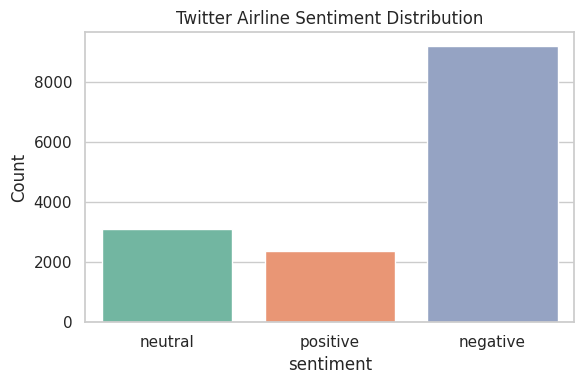

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Twitter Airline Sentiment Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
df['label'] = df['sentiment'].map({'negative':0,'neutral':1,'positive':2})

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [14]:
model = LogisticRegression(max_iter=300)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=300)

In [15]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred, target_names=['negative','neutral','positive']))

Accuracy: 79.51%
              precision    recall  f1-score   support

    negative       0.82      0.93      0.88      1889
     neutral       0.65      0.48      0.55       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928



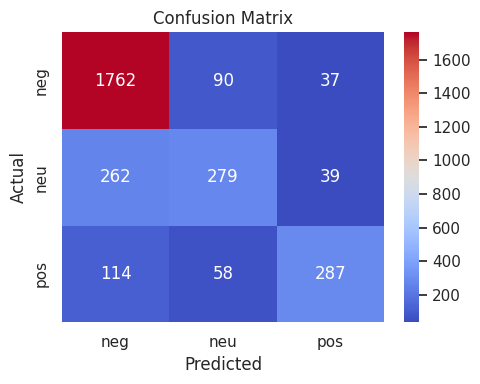

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['neg','neu','pos'], yticklabels=['neg','neu','pos'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

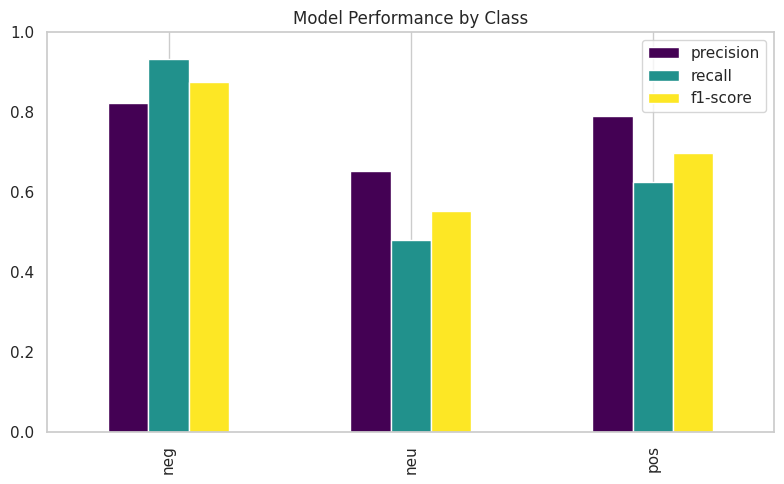

In [17]:
report_df = pd.DataFrame(classification_report(y_test, y_pred, target_names=['neg','neu','pos'], output_dict=True)).T.iloc[:3]
report_df[['precision','recall','f1-score']].plot(kind='bar', colormap='viridis', figsize=(8,5))
plt.title("Model Performance by Class")
plt.ylim(0,1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()